In [1]:
from BigDFT import Logfiles as L

In [9]:
tddftlogold=L.Logfile('input-virt/log-old.yaml')

In [12]:
eandf=tddftlogold.log['Excitation Energy and Oscillator Strength']

The first component of each element corresponds to the excitation energies written as $E=\sqrt{E^2}$.

The second component is defined as:
$$
\frac{1}{3} \sum_{i=x,y,z} 2E  |f_i^E|^2
$$
where 
$$
f_i^E  \equiv \sum_{p\alpha} \left| E^2\right]_{p\alpha} d_i^{p\alpha}
$$
and
$$
d_i^{p\alpha} \equiv \int \mathrm d \mathbf r \rho_{p\alpha}(\mathbf r) \left(x_i - c_i\right)
$$
which means that this component (d_i^{p\alpha} is wrong, as it lacks the multiplication by the  term $\sqrt{(\epsilon_\alpha - \epsilon_p)}$

In [13]:
len(eandf)

320

In [2]:
import numpy as np

In [129]:
C=np.loadtxt('input-virt/coupling_matrix.txt')

In [130]:
Esquare,E2=np.linalg.eigh(C)

In [131]:
from BigDFT import DoS
reload(DoS)

<module 'BigDFT.DoS' from '/local/binaries/gfortran-fpe-1.8/install/lib/python2.7/site-packages/BigDFT/DoS.pyc'>

In [132]:
di=np.loadtxt('input-virt/transition_dipoles.txt')

In [120]:
def validate_eigensystem(H,e,w):
    """
    Inspect the validity of the eigensystem e,w as eigenvalues and 
    eigenvectors of the matrix H    
    """
    for ind,e in enumerate(e):
        isok = np.allclose(H.dot(w[:,ind]),e*w[:,ind],atol=1.e-12)
        if not isok: print('Eigenvalue',ind,'is false')
    print('Validation terminated')


In [121]:
validate_eigensystem(C,Esquare,E2)

Validation terminated


In [133]:
fi=np.dot(E2.T,di)

In [142]:
os=[]
for e2,fe in zip(Esquare,fi):
    os.append(2.0*e2*fe.dot(fe)/3.0)
os=np.array(os)

In [135]:
reload(DoS)

<module 'BigDFT.DoS' from '/local/binaries/gfortran-fpe-1.8/install/lib/python2.7/site-packages/BigDFT/DoS.pyc'>

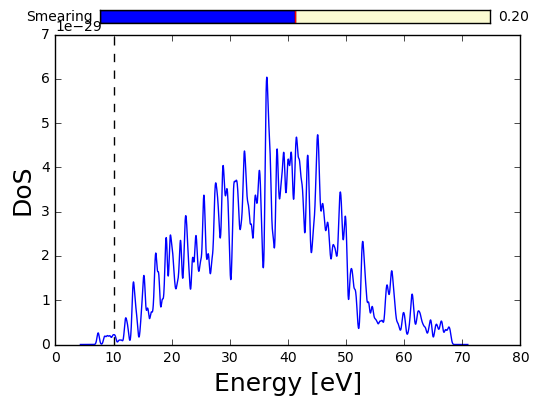

In [143]:
spectrum=DoS.DoS(energies=np.sqrt(Esquare),fermi_level=10/27.211,units='AU',norm=os)
spectrum.plot()

In [137]:
sumx=0.0
sumy=0.0
sumz=0.0
for e2,fe in zip(Esquare,fi):
    sumx+=2.0/np.sqrt(e2)*fe[0]*fe[1]
    sumy+=2.0/np.sqrt(e2)*fe[1]*fe[1]
    sumz+=2.0/np.sqrt(e2)*fe[2]*fe[2]
print sumx,sumy,sumz

0.0204962277372 8.04277949601 10.3538447814


In [140]:
fe=fi[0]

In [141]:
fe,fe.dot(fe)

(array([  1.97941150e-15,  -2.18153288e-15,   6.82576670e-16]),
 9.1430664798984981e-30)

Let us verify the TRK sum rule:

In [139]:
sumx=0.0
sumy=0.0
sumz=0.0
for e2,fe in zip(Esquare,fi):
    sumx+=2.0*fe[0]*fe[0]/e2
    sumy+=2.0*fe[1]*fe[1]/e2
    sumz+=2.0*fe[2]*fe[2]/e2
print sumx,sumy,sumz

10.8119800988 10.8109928513 15.4838546971
